# COVID-19 Global Data Tracker

This notebook analyzes global COVID-19 data from Our World in Data.  
We'll explore case and death trends using data visualizations and insights.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load data from OWID
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
df = pd.read_csv(url)

print("Data shape:", df.shape)
df.head()


Data shape: (429435, 67)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [2]:
# Select columns of interest
df = df[['date', 'location', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'population']]

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter out continent-level summaries
exclude = ['World', 'Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania']
df = df[~df['location'].isin(exclude)]

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 417680 entries, 0 to 429434
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          417680 non-null  datetime64[ns]
 1   location      417680 non-null  object        
 2   total_cases   400086 non-null  float64       
 3   new_cases     398441 non-null  float64       
 4   total_deaths  400086 non-null  float64       
 5   new_deaths    398890 non-null  float64       
 6   population    417680 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 25.5+ MB


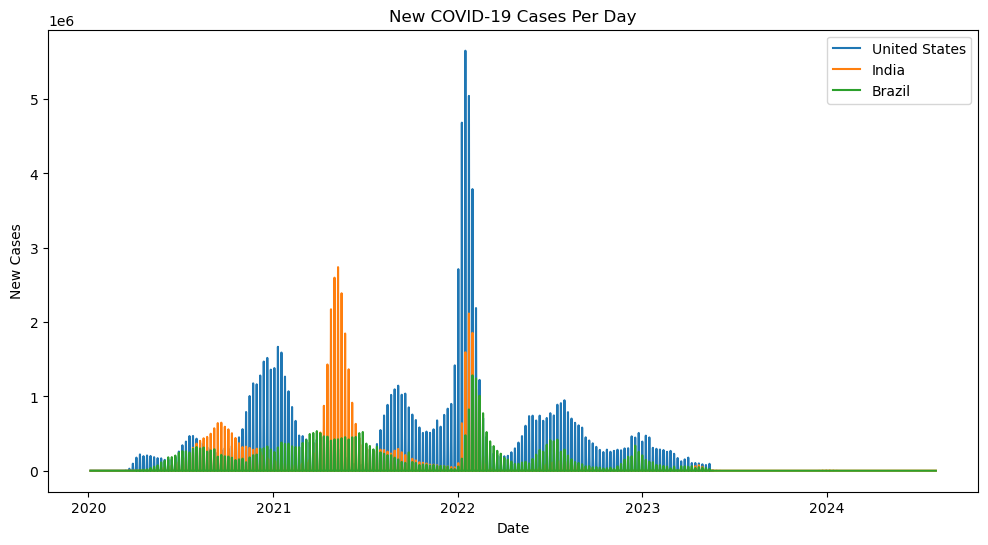

In [3]:
plt.figure(figsize=(12,6))
countries = ['United States', 'India', 'Brazil']

for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

plt.title('New COVID-19 Cases Per Day')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.show()


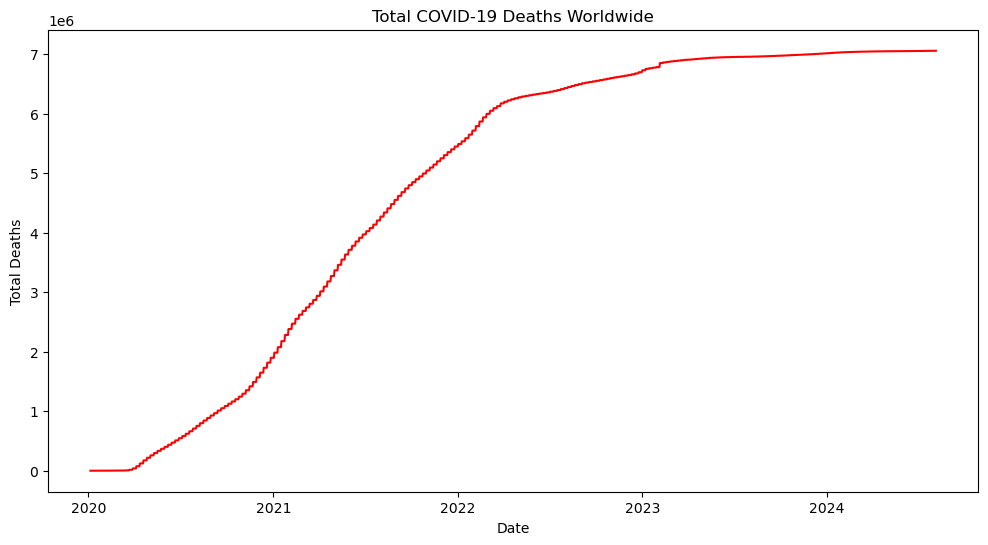

In [4]:
# Get global data separately (load again to include 'World')
world_df = pd.read_csv(url)
world_df = world_df[world_df['location'] == 'World']
world_df['date'] = pd.to_datetime(world_df['date'])

plt.figure(figsize=(12,6))
plt.plot(world_df['date'], world_df['total_deaths'], color='red')
plt.title('Total COVID-19 Deaths Worldwide')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.show()


## Insights and Reflections

- The pandemic showed multiple waves across countries at different times.
- The death curve globally shows a consistent rise, underscoring COVID-19's ongoing threat.
- Data-driven insights help in forming better public health policies.
- This project uses real-time data and Python visualization tools to bring clarity to a complex issue.
